In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import random
import plotly.offline as pyo
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-mart-sales-prediction/Test.csv
/kaggle/input/big-mart-sales-prediction/Submission.csv
/kaggle/input/big-mart-sales-prediction/Train.csv


In [3]:
import sklearn
print(sklearn.__version__)

0.23.2


In [4]:
df=pd.read_csv('../input/big-mart-sales-prediction/Train.csv')
df_test=pd.read_csv('../input/big-mart-sales-prediction/Test.csv')

In [5]:
df.skew()
#ourtarget var is right skewd

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

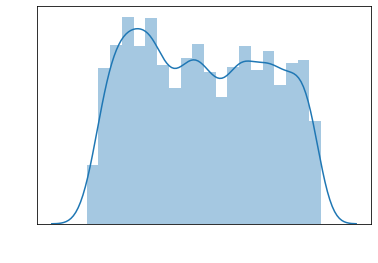

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
sns.distplot(df['Item_Weight'])

In [10]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())

In [11]:
df_obj=df.select_dtypes(exclude=np.number)
df_num=df.select_dtypes(include=np.number)

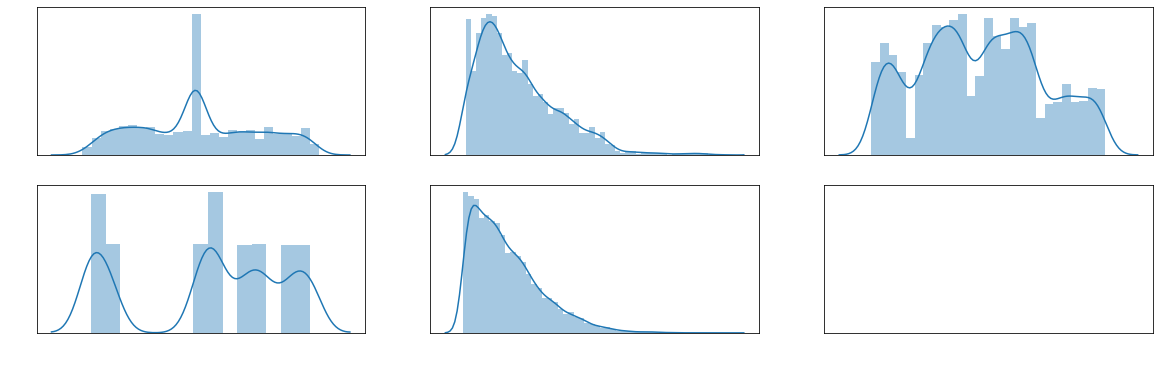

In [12]:
fig,ax=plt.subplots(2,3,figsize=(20,6))
sns.distplot(df['Item_Weight'],ax=ax[0,0])
sns.distplot(df['Item_Visibility'],ax=ax[0,1])
sns.distplot(df['Item_MRP'],ax=ax[0,2])
sns.distplot(df['Outlet_Establishment_Year'],ax=ax[1,0])
sns.distplot(df['Item_Outlet_Sales'],ax=ax[1,1])

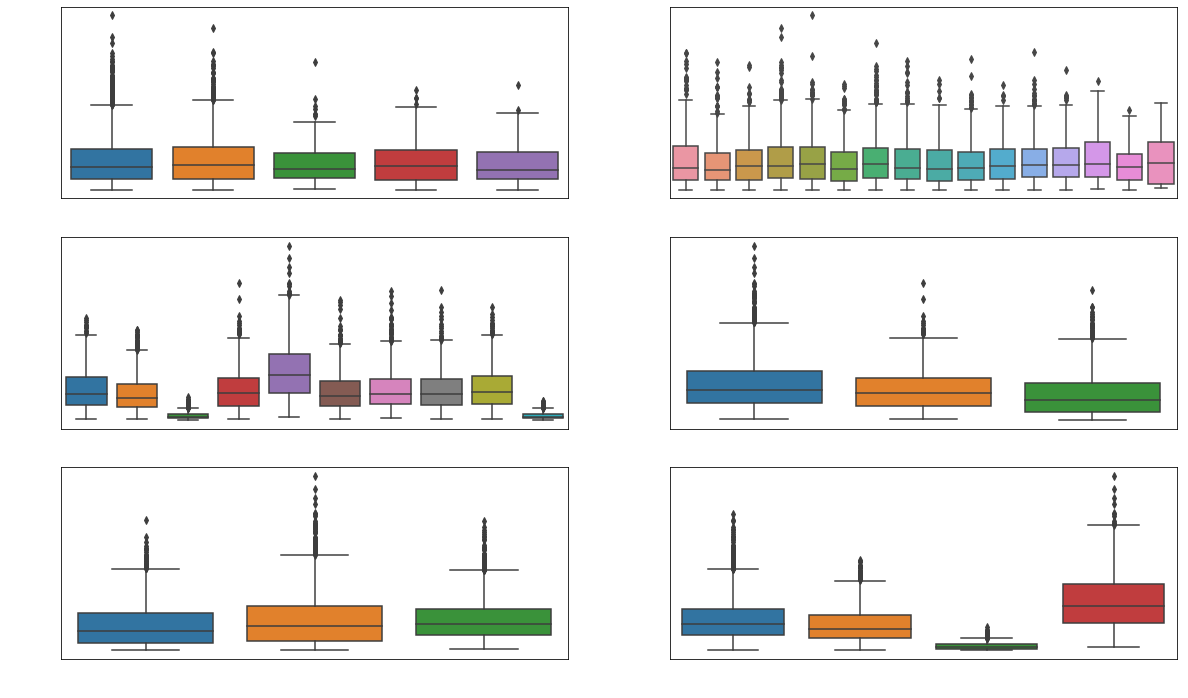

In [13]:
fig,ax=plt.subplots(3,2,figsize=(20,12))
sns.boxplot(df['Item_Fat_Content'],df['Item_Outlet_Sales'],ax=ax[0,0])
sns.boxplot(df['Item_Type'],df['Item_Outlet_Sales'],ax=ax[0,1])
sns.boxplot(df['Outlet_Identifier'],df['Item_Outlet_Sales'],ax=ax[1,0])
sns.boxplot(df['Outlet_Size'],df['Item_Outlet_Sales'],ax=ax[1,1])
sns.boxplot(df['Outlet_Location_Type'],df['Item_Outlet_Sales'],ax=ax[2,0])
sns.boxplot(df['Outlet_Type'],df['Item_Outlet_Sales'],ax=ax[2,1])

In [14]:
df['Item_Fat_Content'].value_counts()#Low Fat,LF,low Fat are same so as  the reg and Regular

def feat_eng(x):
    if x in ['Low Fat','LF','low fat']:
        return 'Low Fat'
    elif x in ['Regular','reg']:
        return 'Regular'
    
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(lambda x: feat_eng(x))

df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].apply(lambda x: feat_eng(x))



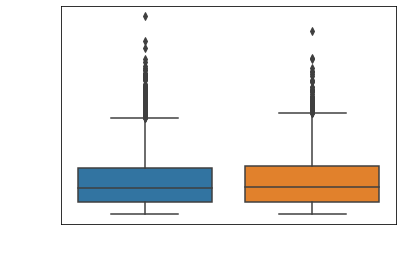

In [15]:
sns.boxplot(df['Item_Fat_Content'],df['Item_Outlet_Sales'])

In [16]:

#df[(df['Item_Fat_Content']=='Low Fat') & (df['Item_Outlet_Sales']>12000)].index 7188

#df[(df['Item_Fat_Content']=='Regular') & (df['Item_Outlet_Sales']>11500)].index 5223

df=df.drop([7188,5223],axis=0)

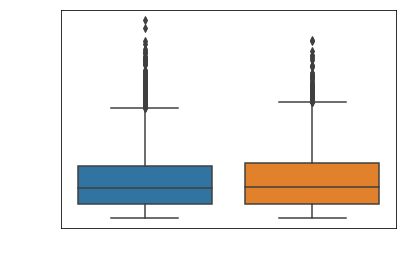

In [17]:
sns.boxplot(df['Item_Fat_Content'],df['Item_Outlet_Sales'])

In [18]:
#Item_Type
ind=df['Item_Type'].value_counts().sort_index().index
cnt=df['Item_Type'].value_counts().sort_index().values
mean_val=df.groupby(['Item_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending=False).values

fig = make_subplots(rows=1, cols=2, specs=[[ {'type':'bar'},{'type':'domain'}]],subplot_titles=['avg_sales','Most_stocked'])
fig.add_traces(go.Bar(y=ind,x=mean_val,orientation='h'),1,1)
fig.add_traces(go.Pie(labels=ind,values=cnt,textinfo='label+percent'),1,2)

fig.show()
#Fruits an Vegetables,Snack Foods,Household are most stocked have less_avg_sales that is since they are most  common consumed food
#Meanwhile Baking goods,Breads,Brekfast hve high mean_sales 

In [19]:
#ItemMRP
mean_val=df.groupby(['Item_Type'])['Item_MRP'].mean().sort_values(ascending=False).values
ind=df.groupby(['Item_Type'])['Item_MRP'].mean().sort_values(ascending=False).index
fig=go.Figure()
fig.add_trace(go.Bar(x=ind,y=mean_val))

#Baking Sodacosts less that is why  its  sales  is  high

In [20]:
px.scatter(df,x='Item_MRP',y='Item_Outlet_Sales')
#its strange sales of  low Mrp have less sales.

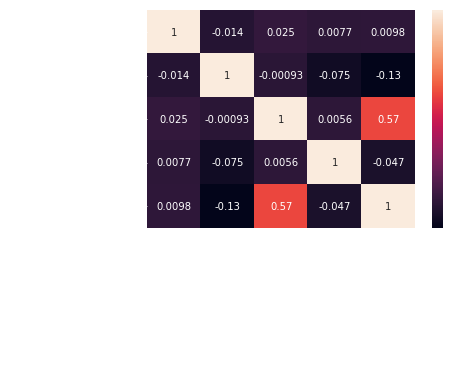

In [21]:
sns.heatmap(df.corr(),annot=True)
#MRP has high corr with target ,as we ahve seen it increases lineraly.

In [22]:
#With respect to Outlest
df.groupby(['Outlet_Location_Type','Outlet_Identifier']).count()

Item_Identifier  Item_Weight  \
Outlet_Location_Type Outlet_Identifier                                 
Tier 1               OUT019                         528          528   
                     OUT046                         930          930   
                     OUT049                         930          930   
Tier 2               OUT017                         926          926   
                     OUT035                         930          930   
                     OUT045                         929          929   
Tier 3               OUT010                         555          555   
                     OUT013                         932          932   
                     OUT018                         928          928   
                     OUT027                         933          933   

                                        Item_Fat_Content  Item_Visibility  \
Outlet_Location_Type Outlet_Identifier                                      
Tier 1               OUT019                          528              528   
                     OUT046                          930              930   
                     OUT049                          930              930   
Tier 2               OUT017                          926              926   
                     OUT035                          930              930   
                     OUT045                          929              929   
Tier 3               OUT010                          555              555   
                     OUT013                          932              932   
                     OUT018                          928              928   
                     OUT027                          933              933   

                                        Item_Type  Item_MRP  \
Outlet_Location_Type Outlet_Identifier                        
Tier 1               OUT019                   528       528   
                     OUT046                   930       930   
                     OUT049                   930       930   
Tier 2               OUT017                   926       926   
                     OUT035                   930       930   
                     OUT045                   929       929   
Tier 3               OUT010                   555       555   
                     OUT013                   932       932   
                     OUT018                   928       928   
                     OUT027                   933       933   

                                        Outlet_Establishment_Year  \
Outlet_Location_Type Outlet_Identifier                              
Tier 1               OUT019                                   528   
                     OUT046                                   930   
                     OUT049                                   930   
Tier 2               OUT017                                   926   
                     OUT035                                   930   
                     OUT045                                   929   
Tier 3               OUT010                                   555   
                     OUT013                                   932   
                     OUT018                                   928   
                     OUT027                                   933   

                                        Outlet_Size  Outlet_Type  \
Outlet_Location_Type Outlet_Identifier                             
Tier 1               OUT019                     528          528   
                     OUT046                     930          930   
                     OUT049                     930          930   
Tier 2               OUT017                       0          926   
                     OUT035                     930          930   
                     OUT045                       0          929   
Tier 3               OUT010                       0          555   
                     OUT013                     932 

In [23]:
px.sunburst(df,path=['Outlet_Location_Type','Outlet_Identifier','Outlet_Type'],values='Item_Outlet_Sales')
#Only Tie3 has all types of Outlets
#Tier 1 and tie2 has just supermarket 1 nad grocerry store

In [24]:
#Now lets check how much % sales does each tier, outlets_type accounts for

fig = make_subplots(rows=1, cols=3,specs=[[{'type':'domain'},{'type':'domain'},{'type':'domain'}]],subplot_titles=['% of sales by each tiers','% of sales by each outlet','% of sales by each Type'])
fig.add_traces(go.Pie(labels=df['Outlet_Location_Type'],values=df['Item_Outlet_Sales']),1,1)
fig.add_traces(go.Pie(labels=df['Outlet_Identifier'],values=df['Item_Outlet_Sales']),1,2)
fig.add_traces(go.Pie(labels=df['Outlet_Type'],values=df['Item_Outlet_Sales']),1,3)


#Tier 3 make most sales,
#Supermarket 1 has  more sales

In [25]:
'''
def cat_convert(x):
    if x<=68:
        return 'V_Low'
    elif  x>68 and x<=135:
        return 'Low'
    elif  x>136 and x<=201:
        return 'Medium'
    else:
        return 'High'

df['Item_MRP_cat']=df['Item_MRP'].apply(lambda x: cat_convert(x))

'''

"\ndef cat_convert(x):\n    if x<=68:\n        return 'V_Low'\n    elif  x>68 and x<=135:\n        return 'Low'\n    elif  x>136 and x<=201:\n        return 'Medium'\n    else:\n        return 'High'\n\ndf['Item_MRP_cat']=df['Item_MRP'].apply(lambda x: cat_convert(x))\n\n"

In [26]:
#Wrt to type which item sells most
df.groupby(['Outlet_Type','Item_Type'])['Item_Outlet_Sales'].count().sort_values(ascending=False)

fig=px.sunburst(df,path=['Outlet_Type','Item_Type'],values='Item_Outlet_Sales')

#fig=px.sunburst(df,path=['Outlet_Location_Type','Outlet_Identifier','Outlet_Type'],values='Item_Outlet_Sales')
fig.show()




'''
these  are most sold  foods in each  outletType

SP1===[Fruits and Vegetable,Snackfood,HouseHold,Frozen food,Dairy,canned etc]
SP2===[SnackFood,F&V,Household,FrozenFood,Dairy,Canned etc]
SP3=Fruits and Vegetable,Snackfood,HouseHold,Frozen food,Dairy,canned etc
Groceery===Snacks,F&V,Household,FF,Dairy,canned and Meat


we saw in  prrevious sunburst chart tier 3 sells most, why because it has all type of Outlets 
'''

'\nthese  are most sold  foods in each  outletType\n\nSP1===[Fruits and Vegetable,Snackfood,HouseHold,Frozen food,Dairy,canned etc]\nSP2===[SnackFood,F&V,Household,FrozenFood,Dairy,Canned etc]\nSP3=Fruits and Vegetable,Snackfood,HouseHold,Frozen food,Dairy,canned etc\nGroceery===Snacks,F&V,Household,FF,Dairy,canned and Meat\n\n\nwe saw in  prrevious sunburst chart tier 3 sells most, why because it has all type of Outlets \n'

In [27]:
d1=df.copy()

In [28]:
#imputing )utlet sixe based on tier  ie tier 2 with Medium and tier3 for grossery store with small
tier2=df[(df['Outlet_Location_Type']=='Tier 2')  & (df['Outlet_Size'].isnull())]
t2_ind=tier2['Outlet_Size'].index
d1.loc[t2_ind,'Outlet_Size']=d1.loc[t2_ind,'Outlet_Size'].fillna('Medium')


tier3=df[(df['Outlet_Location_Type']=='Tier 3')  & (df['Outlet_Size'].isnull())]
t3_ind=tier3['Outlet_Size'].index
d1.loc[t3_ind,'Outlet_Size']=d1.loc[t3_ind,'Outlet_Size'].fillna('Small')
df['Outlet_Size']=d1['Outlet_Size']
tier2

df['Outlet_Size']=d1['Outlet_Size']


#####################################TEST
#imputing outlet sixe based on tier  ie tier 2 with Medium and tier3 for grossery store with small
tier2=df_test[(df_test['Outlet_Location_Type']=='Tier 2')  & (df_test['Outlet_Size'].isnull())]
t2_ind=tier2['Outlet_Size'].index
df_test.loc[t2_ind,'Outlet_Size']=df_test.loc[t2_ind,'Outlet_Size'].fillna('Medium')


tier3=df_test[(df_test['Outlet_Location_Type']=='Tier 3')  & (df_test['Outlet_Size'].isnull())]
t3_ind=tier3['Outlet_Size'].index
df_test.loc[t3_ind,'Outlet_Size']=df_test.loc[t3_ind,'Outlet_Size'].fillna('Small')


In [29]:
#grouping Item Id

df['Item_Id']=df['Item_Identifier'].str[:2]
df_test['Item_Id']=df_test['Item_Identifier'].str[:2]

df.groupby(['Item_Id','Item_Type'])['Item_Outlet_Sales'].mean()

Item_Id  Item_Type            
DR       Dairy                    1751.272763
         Hard Drinks              2139.221622
         Soft Drinks              2006.511735
FD       Baking Goods             1952.971207
         Breads                   2204.132226
         Breakfast                2111.808651
         Canned                   2225.194904
         Dairy                    2356.855838
         Frozen Foods             2132.867744
         Fruits and Vegetables    2281.025391
         Meat                     2158.977911
         Seafood                  2326.065928
         Snack Foods              2277.321739
         Starchy Foods            2374.332773
NC       Health and Hygiene       2010.000265
         Household                2246.872110
         Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

In [30]:
def item_id(x):
    if x in ['Dairy','Hard Drinks','Soft Drinks']:
        return  'Drinks'
    elif x in  ['Baking Goods','Breads','Breakfast','Canned','Dairy','Frozen Foods','Fruits and Vegetables','Meat','Seafood','Snack Foods','Starchy Foods']:
        return 'Foods'
    else:
        return 'Non Consumable'
    
    
df['Item_Id']=df['Item_Type'].apply(lambda x:item_id(x))    
df_test['Item_Id']=df_test['Item_Type'].apply(lambda x:item_id(x))    

In [31]:
#px.pie(df, values='Item_Outlet_Sales', names='Item_Id', title='Types of Food with high Sales')
fig = go.Figure(data=[go.Pie(labels=df['Item_Id'], values=df['Item_Outlet_Sales'], pull=[0, 0, 0.02],title='Types of Food with high Sales')])
fig.show()

In [32]:
#outlet Establishment Year
df.groupby(['Outlet_Location_Type','Outlet_Establishment_Year','Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].mean()

Outlet_Location_Type  Outlet_Establishment_Year  Outlet_Type        Outlet_Size
Tier 1                1985                       Grocery Store      Small           340.329723
                      1997                       Supermarket Type1  Small          2277.844267
                      1999                       Supermarket Type1  Medium         2348.354635
Tier 2                2002                       Supermarket Type1  Medium         2192.384798
                      2004                       Supermarket Type1  Small          2438.841866
                      2007                       Supermarket Type1  Medium         2340.675263
Tier 3                1985                       Supermarket Type3  Medium         3674.942687
                      1987                       Supermarket Type1  High           2298.995256
                      1998                       Grocery Store      Small           339.351662
                      2009                       Supermarket Type

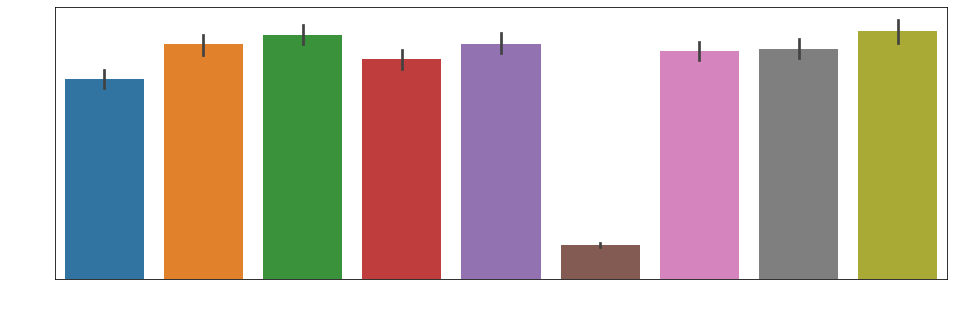

In [33]:
plt.figure(figsize=(16,5))
sns.barplot(2013-df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'])


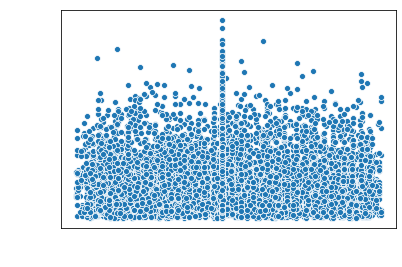

In [34]:
sns.scatterplot(df['Item_Weight'],df['Item_Outlet_Sales'])
#there is no relation

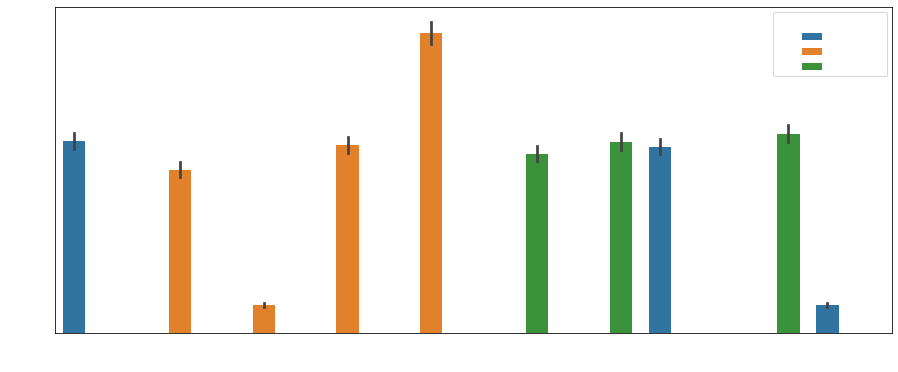

In [35]:
plt.figure(figsize=(15,6))
sns.barplot(df['Outlet_Identifier'],df['Item_Outlet_Sales'],hue=df['Outlet_Location_Type'])

In [36]:


df1=df.copy()

df1.columns

df_test1=df_test.copy()


In [37]:
'''
df1['Item_Fat_Content']=df1['Item_Fat_Content'].map({'Low Fat':1,'Regular':2})
df1['Outlet_Size']=df1['Outlet_Size'].map({'Small':1,"Medium":2,"High":3})

df_test1['Item_Fat_Content']=df_test1['Item_Fat_Content'].map({'Low Fat':1,'Regular':2})
df_test1['Outlet_Size']=df_test1['Outlet_Size'].map({'Small':1,"Medium":2,"High":3})
'''

'\ndf1[\'Item_Fat_Content\']=df1[\'Item_Fat_Content\'].map({\'Low Fat\':1,\'Regular\':2})\ndf1[\'Outlet_Size\']=df1[\'Outlet_Size\'].map({\'Small\':1,"Medium":2,"High":3})\n\ndf_test1[\'Item_Fat_Content\']=df_test1[\'Item_Fat_Content\'].map({\'Low Fat\':1,\'Regular\':2})\ndf_test1[\'Outlet_Size\']=df_test1[\'Outlet_Size\'].map({\'Small\':1,"Medium":2,"High":3})\n'

In [38]:
columns=['Item_Id','Item_Fat_Content','Outlet_Location_Type','Outlet_Identifier','Outlet_Size','Outlet_Type']

for col in columns:
    dummy=pd.get_dummies(df1[col],prefix=col,drop_first=True)
    #df1.drop(col,inplace=True,axis=1)
    df1=df1.join(dummy)
    
for col in columns:
    dummy=pd.get_dummies(df_test1[col],prefix=col,drop_first=True)
    #df1.drop(col,inplace=True,axis=1)
    df_test1=df_test1.join(dummy)
        
        
df1=df1.drop(df1.loc[:,columns],axis=1)

df_test1=df_test1.drop(df_test1.loc[:,columns],axis=1)

In [39]:
'''
from sklearn.preprocessing import LabelEncoder 

le=LabelEncoder()
df1['Outlet_Size']=le.fit_transform(df1['Outlet_Size'])
df1['Outlet_Location_Type']=le.fit_transform(df1['Outlet_Location_Type'])
'''

"\nfrom sklearn.preprocessing import LabelEncoder \n\nle=LabelEncoder()\ndf1['Outlet_Size']=le.fit_transform(df1['Outlet_Size'])\ndf1['Outlet_Location_Type']=le.fit_transform(df1['Outlet_Location_Type'])\n"

In [40]:

df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Id_Foods', 'Item_Id_Non Consumable', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [41]:
X=df1[[ 'Item_MRP', 'Item_Id_Foods', 'Item_Id_Non Consumable', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']]
y=df1['Item_Outlet_Sales']



In [79]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=22)

In [62]:
lr=LinearRegression()
score=cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=cv,n_jobs=-1)
pred=score.mean()
np.sqrt(-pred)

1123.9348228970273

In [64]:
lr.fit(X,y)
pred=lr.predict(X_TEST)
pred.min()

-1367.969583530883

In [80]:
def score(obj):
    obj.fit(x_train,y_train)
    pred=(obj.predict(x_test))
    print(r2_score(y_test,pred))
    print(pred.min())
    print(np.sqrt(mean_squared_error(y_test,pred)))
    
lr=LinearRegression()
score(lr)

0.5512133588417336
-1395.8109628057812
1163.5101192158297


In [ ]:
#RandomForrest

In [81]:
rf=RandomForestRegressor()
score(rf)

0.5061015735498011
45.720486000000044
1220.5878020721295


In [85]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[10,50,100,200,500],'max_depth':[2,4,10,15],'min_samples_split':[2,5,8,10],'max_features':['auto', 'sqrt', 'log2']}

gs=GridSearchCV(rf,param_grid=params,n_jobs=-1,cv=3)
score(gs)


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



0.5734759695337843
60.91840946540489
1134.284392935183


In [86]:
from sklearn.ensemble  import AdaBoostRegressor,GradientBoostingRegressor

In [87]:

adb=AdaBoostRegressor(learning_rate=0.1)
params={'n_estimators':[10,50,100,200,500]}
gsadb=GridSearchCV(adb,param_grid=params,cv=5)
score(gsadb)


0.49805380068878824
792.1957954655866
1230.4919853942108


In [ ]:
#Gradient Boosting

gbrt = GradientBoostingRegressor(max_depth=5, warm_start=True)
min_val_error = float("inf") 
error_going_up = 0 
for n_estimators in range(1, 120):    
    gbrt.n_estimators = n_estimators    
    gbrt.fit(x_train, y_train)    
    y_pred = gbrt.predict(x_test)    
    val_error = np.sqrt(mean_squared_error(y_test, y_pred))
    print(val_error,gbrt.n_estimators)
    if val_error < min_val_error:        
        min_val_error = val_error        
        error_going_up = 0    
    else:        
        error_going_up += 1        
        if error_going_up == 5:            
            break  # early stopping
print(min_val_error)            

In [88]:

gbrt = GradientBoostingRegressor(max_depth=5, n_estimators=29,warm_start=True)
score(gbrt)

0.5793202905139311
216.09915738570294
1126.4864883328642


In [ ]:
'''
from sklearn.model_selection import RepeatedStratifiedKFold,RepeatedKFold
from sklearn.ensemble import StackingRegressor

def get_models():
	models = dict()
	models['rf'] = RandomForestRegressor(max_depth= 4,max_features='auto',min_samples_split=10,n_estimators=200)
	models['gbr'] =GradientBoostingRegressor(max_depth=5, n_estimators=29,warm_start=True)
	models['stacking'] = get_stacking()
	return models
 
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores   
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('rf',RandomForestRegressor()))
	level0.append(('gbr',GradientBoostingRegressor()))
	#level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison


In [ ]:
'''

In [89]:
X_TEST=df_test1[[ 'Item_MRP' ,'Item_Id_Foods',
       'Item_Id_Non Consumable', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']]



In [ ]:
'''
from sklearn.tree import DecisionTreeRegressor
## define the base models
level0 = list()
level0.append(('rf',RandomForestRegressor()))
level0.append(('gbr',GradientBoostingRegressor()))
	#level0.append(('svm', SVR()))
	# define meta learner model
level1 = DecisionTreeRegressor()
	# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
model.fit(X, y)
# make a prediction for one example
pred= model.predict(X_TEST)
#print('Predicted Value: %.3f' % (pred))
'''

In [90]:
pred=gbrt.predict(X_TEST)
print(pred.min())

216.09915738570294


In [91]:
sample=pd.read_csv('../input/big-mart-sales-prediction/Submission.csv',usecols=[1,2])
sample['Item_Outlet_Sales']=pd.Series(pred)

In [92]:
sample.to_csv('Stacking.csv',index=False)

0.033009516806495644